# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     -------------------------------------- 675.6/675.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675976 sha256=6c326327765d39805951341e7dba128ba2d7ebb24ba693ba8f09638b1938f7bd
  Stored in directory: c:\users\lanno\appdata\local\pip\cache\wheels\e9\27\5f\7defd70aaec29af33fe5e2110843e14dcfc44cba710a0dd957
Successfully built citipy


In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | porto velho
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | vilyuchinsk
Processing Record 8 of Set 1 | qusmuryn
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | uvira
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | polyarnyy
Processing Record 14 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 15 of Set 1 | tamale
Processing Record 16 of Set 1 | flen
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | klyuchi
Processing Record 19 of Set 1 | port saint john's
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22 of Set 1 

In [3]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'pd' is not defined

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,55.85,54,75,20.71,CL,1741524100
1,porto velho,-8.7619,-63.9039,78.85,89,40,2.30,BR,1741524045
2,olonkinbyen,70.9221,-8.7187,20.37,66,100,6.85,SJ,1741524102
3,albany,42.6001,-73.9662,28.40,65,16,3.00,US,1741524103
4,kodiak,57.7900,-152.4072,35.11,93,100,19.57,US,1741524104


In [13]:
# Convert Date into functional date time information
from datetime import datetime

city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit="s")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,55.85,54,75,20.71,CL,2025-03-09 12:41:40
1,porto velho,-8.7619,-63.9039,78.85,89,40,2.30,BR,2025-03-09 12:40:45
2,olonkinbyen,70.9221,-8.7187,20.37,66,100,6.85,SJ,2025-03-09 12:41:42
3,albany,42.6001,-73.9662,28.40,65,16,3.00,US,2025-03-09 12:41:43
4,kodiak,57.7900,-152.4072,35.11,93,100,19.57,US,2025-03-09 12:41:44


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,55.85,54,75,20.71,CL,2025-03-09 12:41:40
1,porto velho,-8.7619,-63.9039,78.85,89,40,2.30,BR,2025-03-09 12:40:45
2,olonkinbyen,70.9221,-8.7187,20.37,66,100,6.85,SJ,2025-03-09 12:41:42
3,albany,42.6001,-73.9662,28.40,65,16,3.00,US,2025-03-09 12:41:43
4,kodiak,57.7900,-152.4072,35.11,93,100,19.57,US,2025-03-09 12:41:44


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

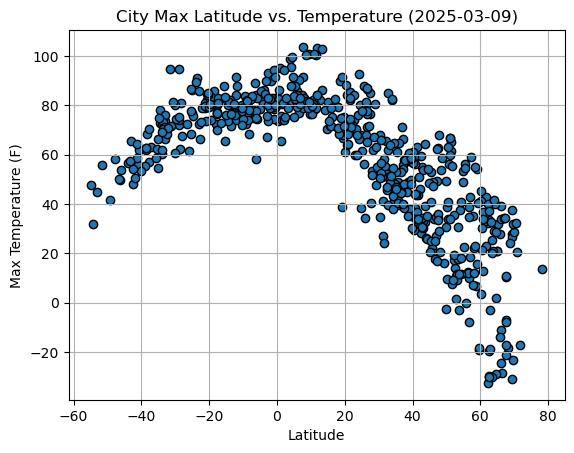

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2025-03-09)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

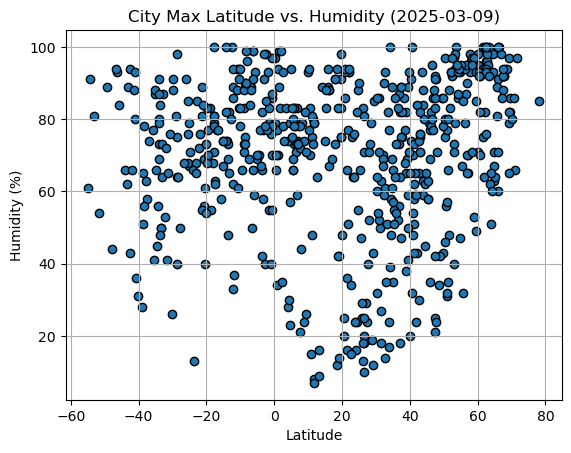

In [24]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2025-03-09)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

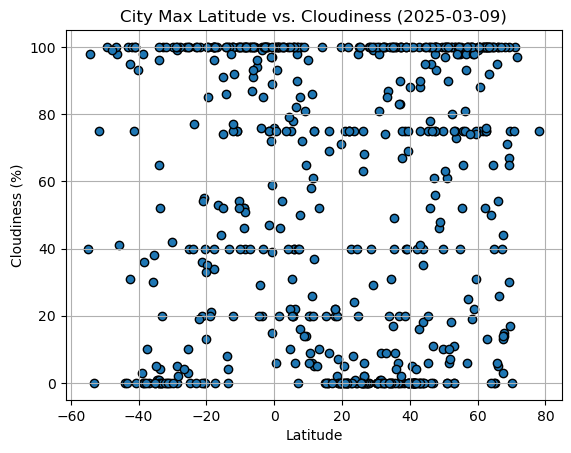

In [23]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2025-03-09)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

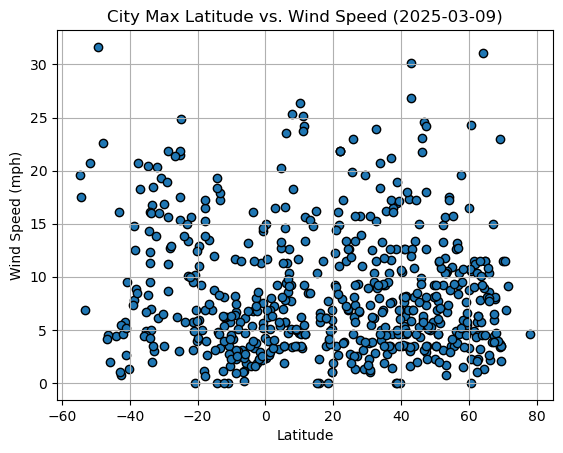

In [22]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2025-03-09)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[(city_data_df["Lat"]>=0) ]

# Display sample data
northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olonkinbyen,70.9221,-8.7187,20.37,66,100,6.85,SJ,2025-03-09 12:41:42
3,albany,42.6001,-73.9662,28.40,65,16,3.00,US,2025-03-09 12:41:43
4,kodiak,57.7900,-152.4072,35.11,93,100,19.57,US,2025-03-09 12:41:44
5,talnakh,69.4865,88.3972,-23.40,82,17,2.04,RU,2025-03-09 12:41:45
6,vilyuchinsk,52.9306,158.4028,10.67,73,0,11.79,RU,2025-03-09 12:41:47


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,55.85,54,75,20.71,CL,2025-03-09 12:41:40
1,porto velho,-8.7619,-63.9039,78.85,89,40,2.30,BR,2025-03-09 12:40:45
9,uvira,-3.4067,29.1458,82.69,77,85,3.29,CD,2025-03-09 12:41:50
10,port-aux-francais,-49.3500,70.2167,41.81,89,100,31.65,TF,2025-03-09 12:41:51
11,waitangi,-43.9535,-176.5597,56.61,66,0,4.45,NZ,2025-03-09 12:38:18


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6885948025687487


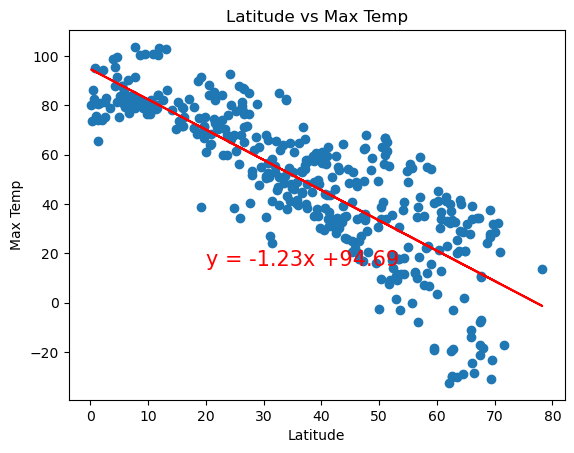

In [6]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.5204250306742791


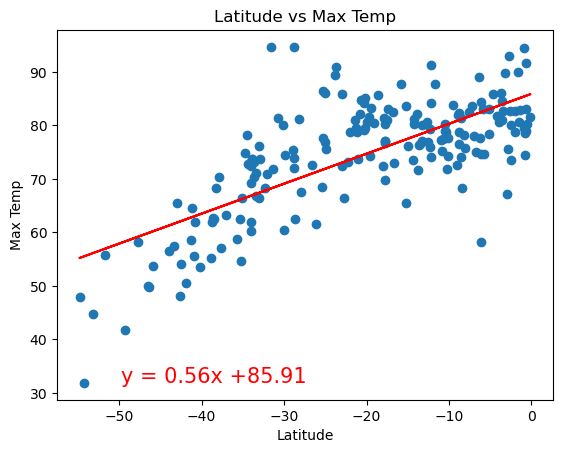

In [11]:
# Linear regression on Southern Hemisphere
x_values2 = southern_hemi['Lat']
y_values2 = southern_hemi['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_values2, y_values2)

# Get regression values
regress_values2 = x_values2 * slope2 + intercept2

# Create line equation string
line_eq2 = "y = " + str(round(slope2,2)) + "x +" + str(round(intercept2,2))

# Create Plot
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq2, (x_values2.min() + 5, y_values2.min()), fontsize=15, color="red")
plt.title(f"Latitude vs Max Temp")

# Print r^2 value
print(f"The r^2-value is: {rvalue2**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The northern hemisphere regression line shows it is predicted to be colder max temps in the higher latitudes, and the inverse as you move closer to the equator (0 latitude). Similarly, in the southern hemisphere, the max temperatures are colder in the latitudes farthest from the equator, but the r^2 value is lower, so it's not as strong as in the northern hemisphere. Perhaps it can be explained by summer season in the southern hemisphere at this time of year.  

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.06525226839010678


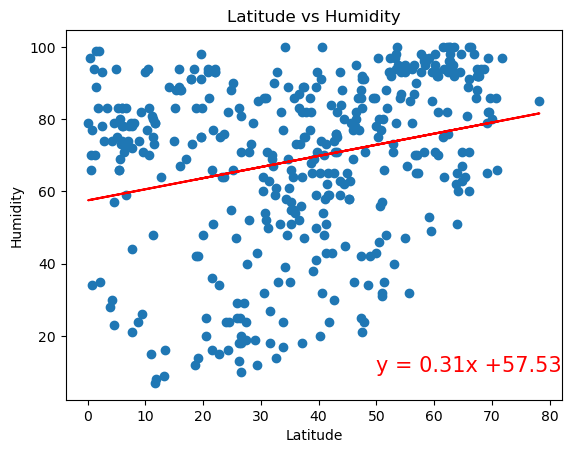

In [19]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values3 = northern_hemi['Lat']
y_values3 = northern_hemi['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_values3, y_values3)

# Get regression values
regress_values3 = x_values3 * slope3 + intercept3

# Create line equation string
line_eq3 = "y = " + str(round(slope3,2)) + "x +" + str(round(intercept3,2))

# Create Plot
plt.scatter(x_values3,y_values3)
plt.plot(x_values3,regress_values3,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq3,(50,10),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity")

# Print r^2 value
print(f"The r^2-value is: {rvalue3**2}")

# Show plot
plt.show()


The r^2-value is: 0.037232207700370966


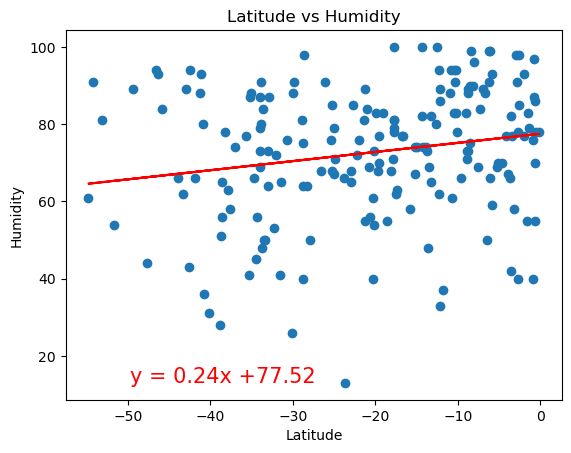

In [22]:
# Southern Hemisphere
x_values4 = southern_hemi['Lat']
y_values4 = southern_hemi['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress(x_values4, y_values4)

# Get regression values
regress_values4 = x_values4 * slope4 + intercept4

# Create line equation string
line_eq4 = "y = " + str(round(slope4,2)) + "x +" + str(round(intercept4,2))

# Create Plot
plt.scatter(x_values4,y_values4)
plt.plot(x_values4,regress_values4,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq4, (x_values4.min() + 5, y_values4.min()), fontsize=15, color="red")
plt.title(f"Latitude vs Humidity")

# Print r^2 value
print(f"The r^2-value is: {rvalue4**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There does not seem to be a strong regressional value between latitude and humidity for either the northern or southern hemisphere. Both instances have r^2 values of less than 7%.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.03049069632375073


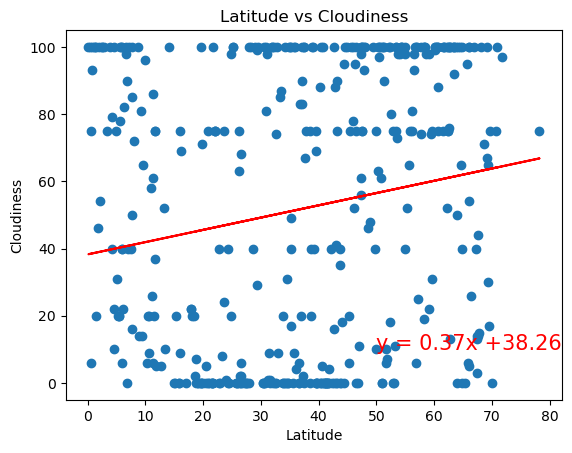

In [25]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values5 = northern_hemi['Lat']
y_values5 = northern_hemi['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope5, intercept5, rvalue5, pvalue5, stderr5) = linregress(x_values5, y_values5)

# Get regression values
regress_values5 = x_values5 * slope5 + intercept5

# Create line equation string
line_eq5 = "y = " + str(round(slope5,2)) + "x +" + str(round(intercept5,2))

# Create Plot
plt.scatter(x_values5,y_values5)
plt.plot(x_values5,regress_values5,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq5,(50,10),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2-value is: {rvalue5**2}")

# Show plot
plt.show()

The r^2-value is: 0.11259384130271158


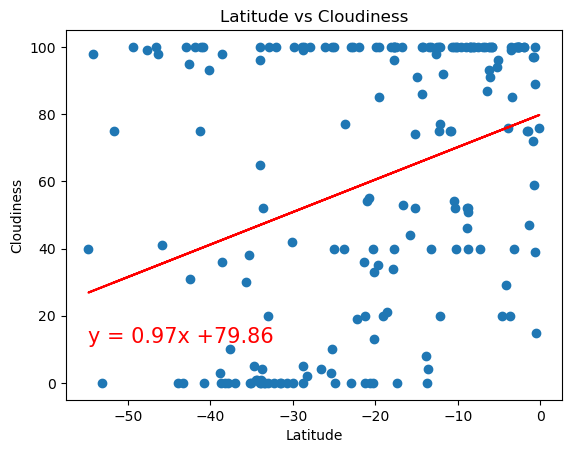

In [24]:
# Southern Hemisphere
x_values6 = southern_hemi['Lat']
y_values6 = southern_hemi['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope6, intercept6, rvalue6, pvalue6, stderr6) = linregress(x_values6, y_values6)

# Get regression values
regress_values6 = x_values6 * slope6 + intercept6

# Create line equation string
line_eq6 = "y = " + str(round(slope6,2)) + "x +" + str(round(intercept6,2))

# Create Plot
plt.scatter(x_values6,y_values6)
plt.plot(x_values6,regress_values6,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq6, (x_values6.min(), y_values6.min()+12), fontsize=15, color="red")
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2-value is: {rvalue6**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Cloudiness does not seem to fit either regression line well in the northern or southern hemisphere when related to latitude. R^2 values are very low too.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.003677315472276286


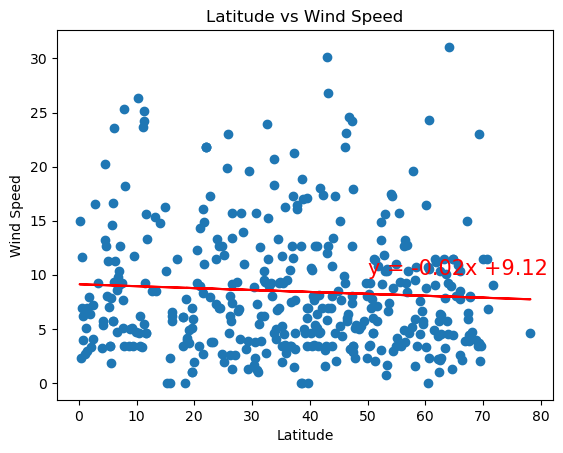

In [26]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values7 = northern_hemi['Lat']
y_values7 = northern_hemi['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope7, intercept7, rvalue7, pvalue7, stderr7) = linregress(x_values7, y_values7)

# Get regression values
regress_values7 = x_values7 * slope7 + intercept7

# Create line equation string
line_eq7 = "y = " + str(round(slope7,2)) + "x +" + str(round(intercept7,2))

# Create Plot
plt.scatter(x_values7,y_values7)
plt.plot(x_values7,regress_values7,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq7,(50,10),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is: {rvalue7**2}")

# Show plot
plt.show()

The r^2-value is: 0.12674371305746435


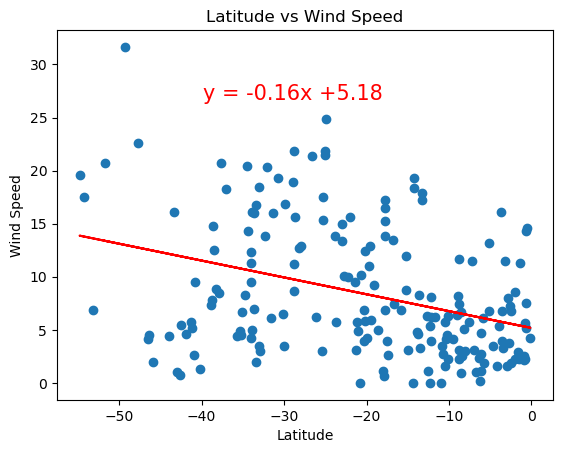

In [30]:
# Southern Hemisphere
x_values8 = southern_hemi['Lat']
y_values8 = southern_hemi['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope8, intercept8, rvalue8, pvalue8, stderr8) = linregress(x_values8, y_values8)

# Get regression values
regress_values8 = x_values8 * slope8 + intercept8

# Create line equation string
line_eq8 = "y = " + str(round(slope8,2)) + "x +" + str(round(intercept8,2))

# Create Plot
plt.scatter(x_values8,y_values8)
plt.plot(x_values8,regress_values8,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq8, (x_values8.min()+15, y_values8.max()-5), fontsize=15, color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is: {rvalue8**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Wind speed looks consistent across the northern hemisphere, so the regression line is fairly flat with less than 1% r^2 value. In the southern hemisphere the wind appears calmer near the equator, but the r^2 value is still very low at 12.6%.